#  로지스틱 회귀
- 로지스틱 회귀 개념
- 합격 불합격 확률
- BreastCancer.csv
- 엔트로피
- 소프트맥스

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 공부한 시간: X1

In [3]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [4]:
p, f = len(pass_time), len(fail_time)
p, f

(18, 16)

In [5]:
X1= np.concatenate((pass_time,fail_time));X1
# X1 = np.hstack((pass_time,fail_time)) # 합격자, 불합격자 공부시간

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 16. , 16. , 16.5,
       17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,  5.2,
        5.4])

## 합격/불합격: y

In [6]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.concatenate((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

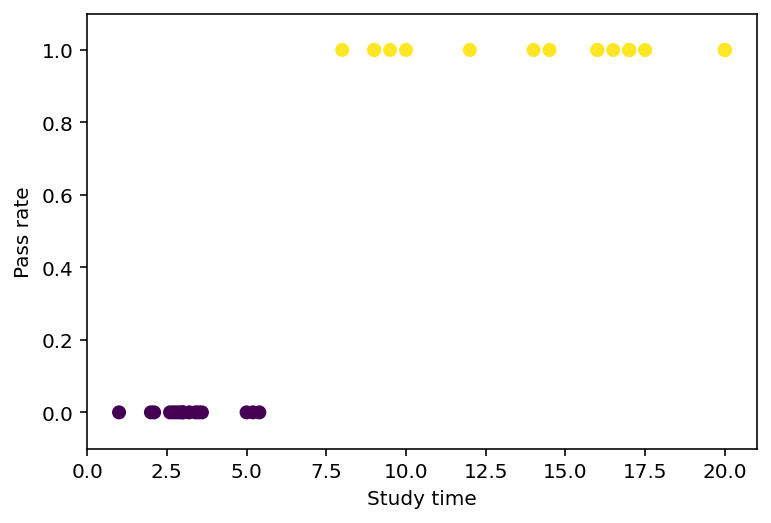

In [7]:
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X1, y, c=y)
plt.show()

In [8]:
model = LogisticRegression() # (1) 생성
model.fit(X1.reshape(-1,1),y) # (2) 학습 34개 모두 사용
print(model.coef_)
print(model.intercept_)

[[1.32947604]]
[-9.18521575]


In [9]:
model.predict([[1.2],[8.8],[7.5]]) # (3) 모델 사용

array([0, 1, 1])

In [10]:
model.predict_proba([[1.2],[8.8],[7.5]]).round(3) # (3) 모델 사용

array([[0.999, 0.001],
       [0.075, 0.925],
       [0.313, 0.687]])

In [11]:
def logreg(z):
    return 1 /(1+np.exp(-z)) # e^^z

In [12]:
model.coef_[0][0]

1.3294760426961625

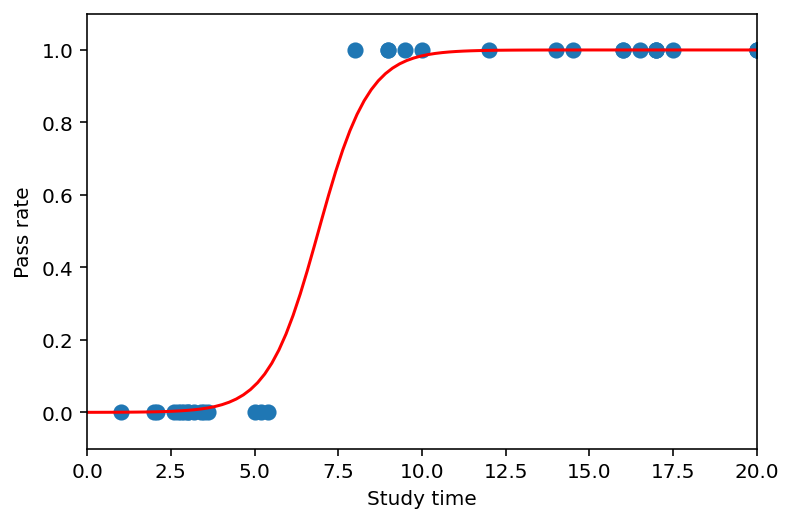

In [13]:
a, b = model.coef_[0][0], model.intercept_[0]
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X1, y, s=50)
xs = np.linspace(0,21,100)
ys = logreg(a*xs + b) # y = ax + b
plt.plot(xs, ys, c='r')
plt.show()

## 시그모이드
- 이진 분류에서 자주 사용되는 모델이며 이를 로지스틱 회귀모델이라고 한다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.11.56.png?raw=1" align='left'  width=400>

##  게임한 시간: X2
- 합격자, 불합격자 수는 동일 해야 함

In [14]:
pass_time_game = [1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_game = [16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]
len(pass_time_game), len(fail_time_game)

(18, 16)

In [15]:
X2= np.concatenate((pass_time_game,fail_time_game));X2

array([ 1.5,  2. ,  2.1,  2.6,  2.1,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,
        3.6,  3. ,  5. ,  5.2,  5.4,  1.3,  1.2, 16. , 17. , 16. , 17. ,
       10. , 12. , 14. , 14.5, 15. , 16. , 16. , 16.5, 17. , 17. , 17. ,
       18.1])

## 공부시간, 게임시간 취합

In [16]:
X = pd.DataFrame(list(zip(X1, X2))) ;X[:10]

,0,1
0,8.0,1.5
1,9.0,2.0
2,9.0,2.1
3,9.5,2.6
4,10.0,2.1
5,12.0,2.8
6,14.0,2.9
7,14.5,3.0
8,16.0,3.2
9,16.0,3.4


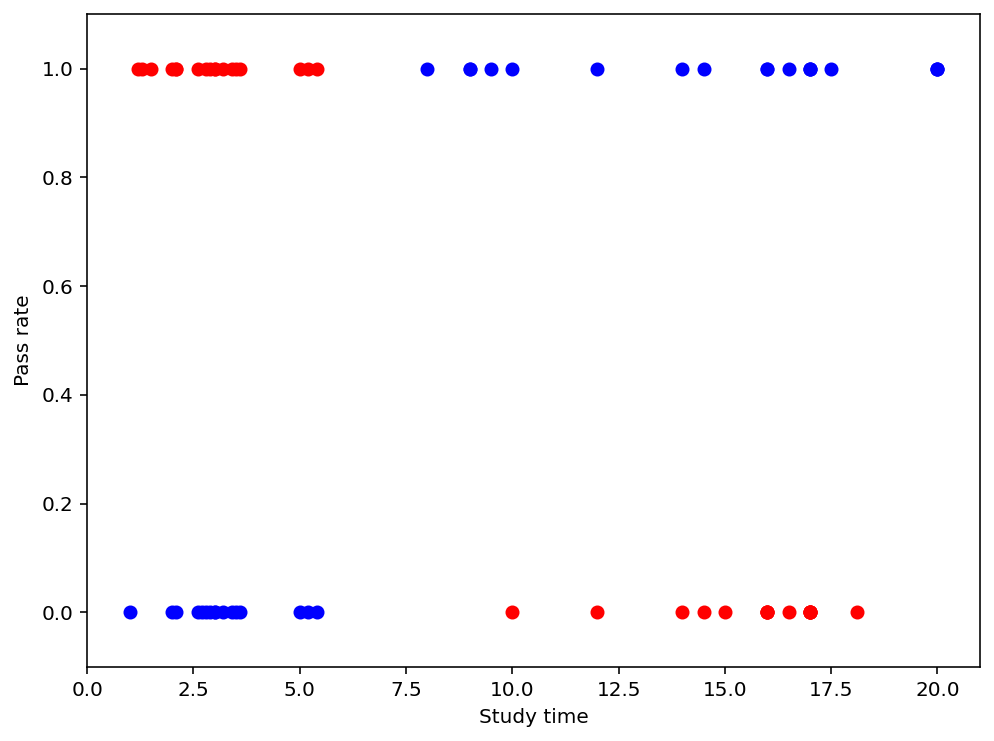

In [17]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
# plt.scatter(X1, y, c=y)
plt.scatter(X[0], y, c='b')
plt.scatter(X[1], y, c='r')
plt.show()

In [18]:
X.shape

(34, 2)

In [19]:
model = LogisticRegression() # (1) 생성
model.fit(X,y) # (2) 학습 34개 모두 사용 (컬럼이 2개))

print(model.coef_)
print(model.intercept_)

[[ 0.47269426 -0.61587179]]
[1.57048764]


In [20]:
model.predict_proba([[1.2,5.5],[8.8,1.9],[20,30]])

array([[7.77226126e-01, 2.22773874e-01],
       [1.03533202e-02, 9.89646680e-01],
       [9.99419930e-01, 5.80070400e-04]])

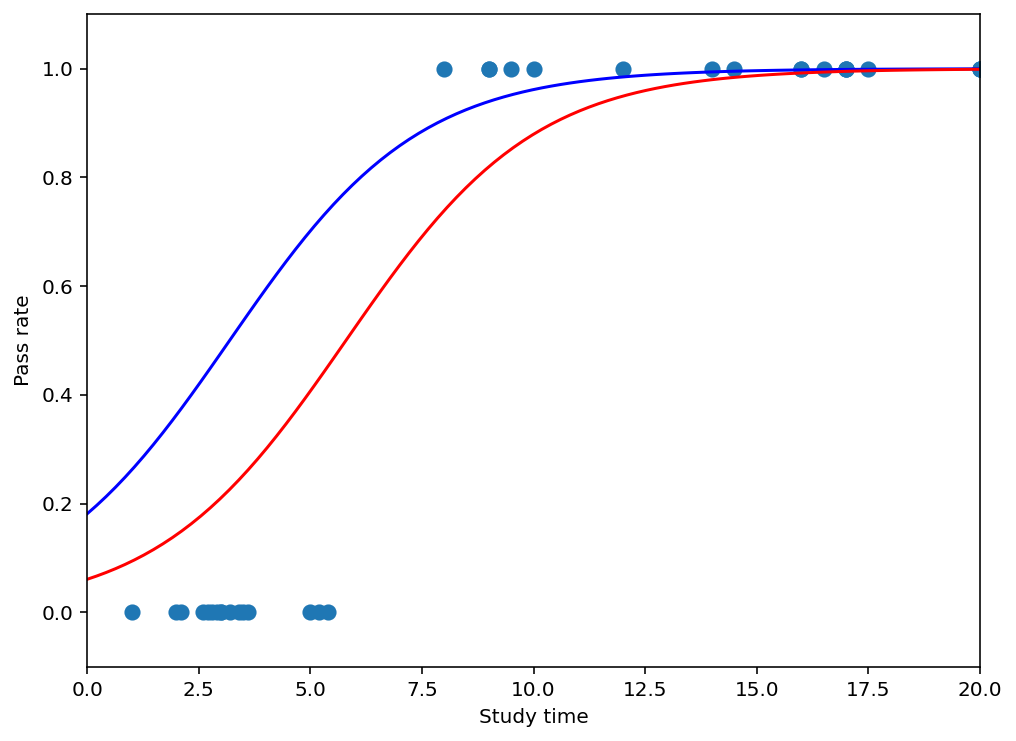

In [21]:
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
xs = np.linspace(0,21, 100)
ys = logreg(a1*xs +a2*5+ b)
plt.plot(xs, ys, c='b')
ys = logreg(a1*xs +a2*7+ b)
plt.plot(xs, ys, c='r')
# ys = logreg(a1*xs +a2*9+ b)
# plt.plot(xs, ys, c='g')
plt.show()

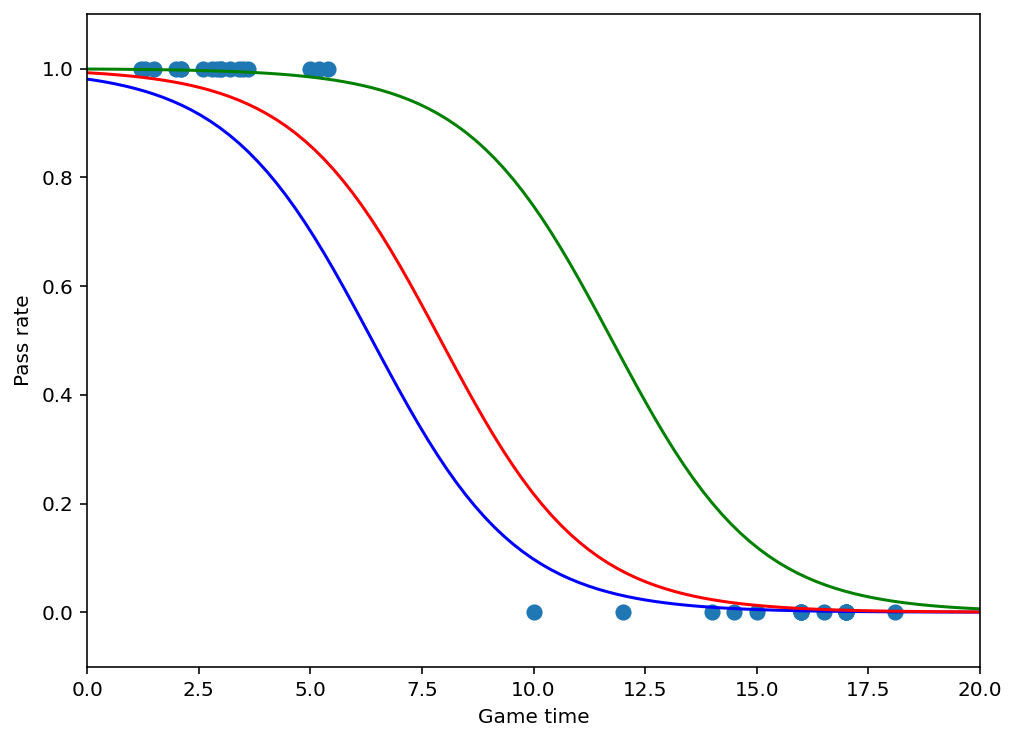

In [22]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Game time')
plt.ylabel('Pass rate')
plt.scatter(X[1], y, s=50)
XX = np.linspace(0,21, 100)
yy = logreg(a1*5 +a2*XX+ b)
plt.plot(XX, yy, c='b')
yy = logreg(a1*7 +a2*XX+ b)
plt.plot(XX, yy, c='r')
yy = logreg(a1*12 +a2*XX+ b)
plt.plot(XX, yy, c='g')
plt.show()

## 시그모이드 함수의 특성

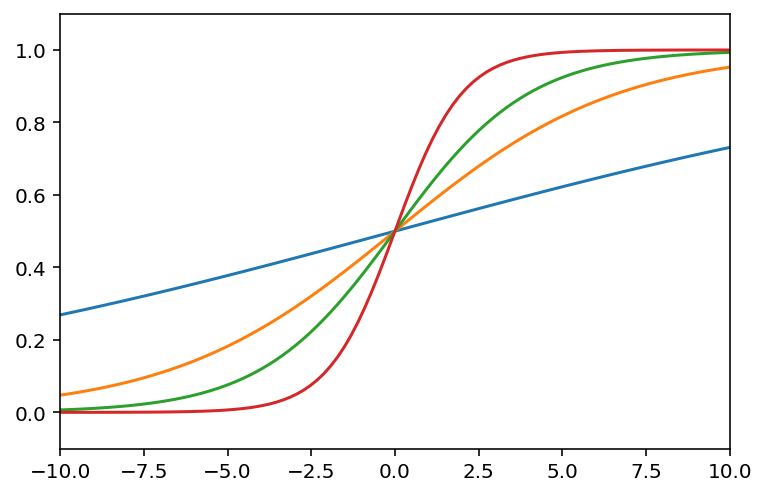

In [29]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.1,0.3, 0.5, 1]
b = 0
xs = np.linspace(-10, 10, 100)

for a in a_list:
  ys = logreg(a*xs + b)
  plt.plot(xs, ys)

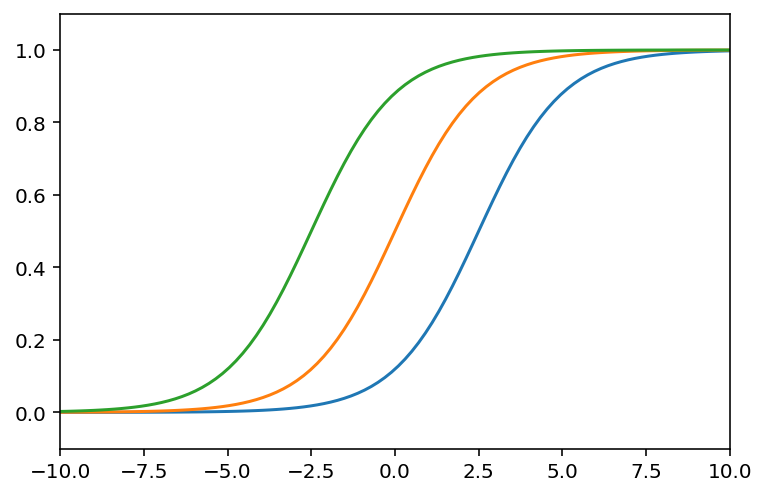

In [30]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a = 0.8
b_list = [-2, 0, 2]
xs = np.linspace(-10, 10, 100)
for b in b_list: 
    ys = logreg(a*xs + b)
    plt.plot(xs, ys)

# 유방암 진단

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   
from sklearn import metrics

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [33]:
type(cancer)

sklearn.utils.Bunch

In [34]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [35]:
cancer.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.shape

(569, 30)

In [39]:
features = ["mean radius"]
X = df[features]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression() # (1) 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 이진분류 성능, accuracy

0.9090909090909091

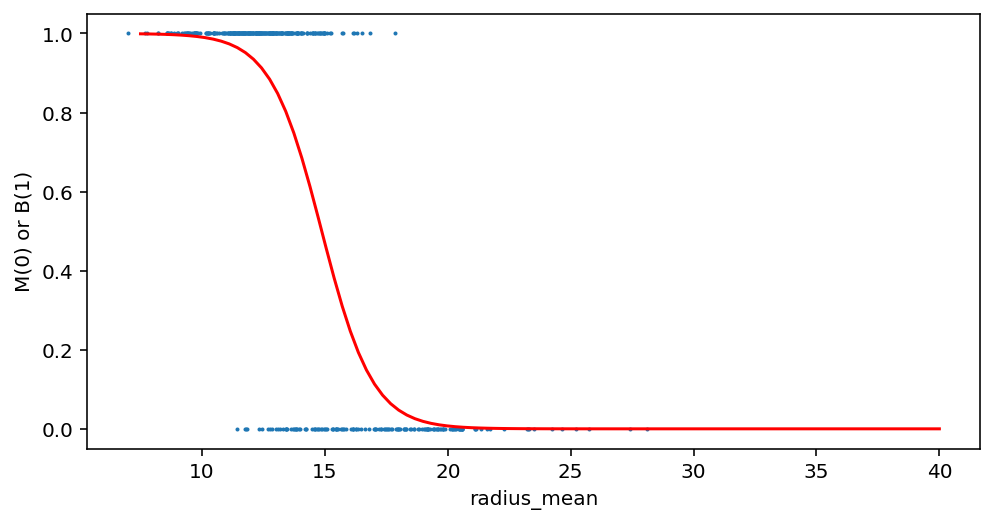

In [40]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(0) or B(1)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [41]:
features = ["mean texture"]
X = df[features]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model=LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7202797202797203

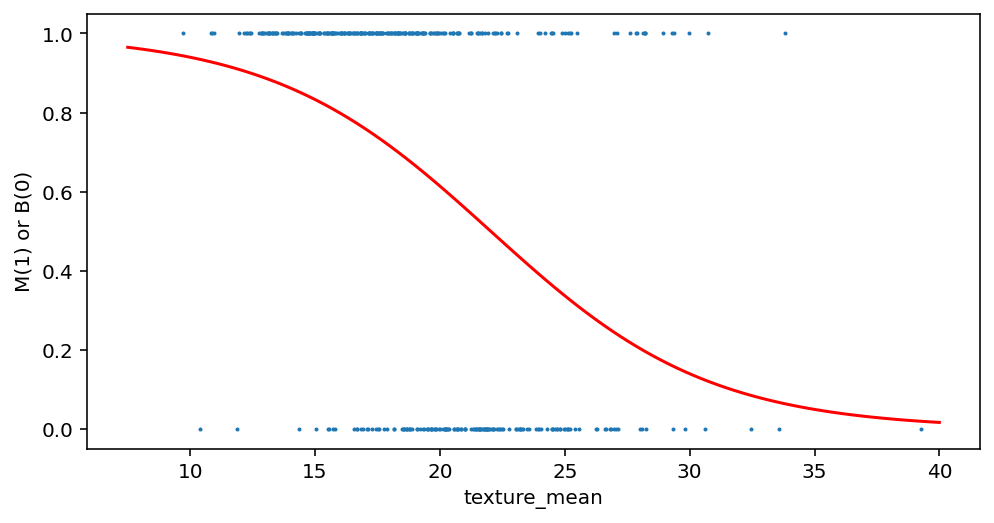

In [43]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [44]:
features = ["mean radius", "mean texture"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 84.62%


## 모든 속성을 사용

In [49]:
X = cancer.data
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/hwa-kim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.965034965034965

In [50]:
model.coef_

array([[ 0.74089949,  0.50435739,  0.28920499, -0.01898985, -0.02813939,
        -0.1326951 , -0.1787034 , -0.07744496, -0.0394529 , -0.00926401,
         0.0235895 ,  0.30333335,  0.03402849, -0.10125007, -0.00187714,
        -0.02576541, -0.03360212, -0.00920729, -0.00976427, -0.00247871,
         0.7889373 , -0.51414343, -0.2032725 , -0.01169468, -0.05173948,
        -0.40641496, -0.49524069, -0.14705716, -0.12966507, -0.04094909]])

## (참고) 다른 알고리즘과 비교

In [51]:
# kNN
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.965034965034965

In [52]:
# 결정 트리
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.916083916083916

In [54]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.951048951048951

# 엔트로피

- 확률 p인 사건의 가치 (score): $s$ = $log$(${1}\over{p}$) = - $log$($p$)
- 확률 $p$ = $e ^ {-s}$
- 즉, 선형적인 값과 확률의 관계는 로그 <-> exp 의 관계이다

## 크로스 엔트로피 

- 참고: 분류 모델의 손실함수, 즉 학습을 하면서 줄여야 할 대상 값은 크로스 엔트로피를 사용한다
- 분류가 잘 수행될수록 (즉, 분류된 하위 그룹의 p가 1 또는 0으로 수렴할수록) 크로스 엔트로피의 합은 점차 줄어들며 이를 분류의 손실함수로 사용한다

$Entropy(H)$ = $p$ $log$(${1}\over{p}$)



<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.11.png?raw=1" align='left'  width=400>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.29.58.png?raw=1" align='left'  width=150>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.32.23.png?raw=1" align='left'  width=200>

# 소프트맥스

- 분류 모델이 계산으로 얻은 선형적인 값을 확률로 매핑하는데 소프트맥스가 주로 사용된다.
- 3개 이상의 분류에서 주로 사용되며 다항 로지스틱스라고도 한다


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.25.18.png?raw=1" align='left'  width=400>

In [95]:
# 소프트맥스 구현(계산식)
score = [11,2,3,4,5] # 선형세계의 가중합
prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.996 0.    0.    0.001 0.002]
